# **4. Logistic Regression**

### **Problem Statement**  

Predict whether a customer will make a purchase (1: Yes, 0: No) using **Logistic Regression**.

---

### **Dataset Overview**  
DataSetLink: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset
#### **Attributes**:  
1. **Age**: Customer's age (integer).  
2. **Gender**: Gender of the customer (0 = Male, 1 = Female).  
3. **Annual Income ($)**: Annual income of the customer in dollars.  
4. **Time Spent on Website**: Time spent by the customer on the website in minutes.  
5. **Loyalty Program**: Membership in loyalty program (0 = No, 1 = Yes).  
6. **Discounts Availed**: Number of discounts availed by the customer (0–5).  
7. **PurchaseStatus (Target Variable)**:  
   - 1: Customer made a purchase.  
   - 0: Customer did not make a purchase.  

---

### **Instructions**  

1. **Data Splitting**  
   - Split the dataset into training (80%) and testing (20%) sets.  

2. **Model Training**  
   - Train a Logistic Regression model on the training data.  

3. **Evaluation**  
   - Evaluate the model using the following metrics:  
     - **Confusion Matrix**  
     - **Precision, Recall, and F1-score**  
    
4. **Report Writing**  
   - Summarize model performance in terms of:  
     - Precision  
     - Recall  
     - F1-score  
     - Insights about which features contributed the most to the predictions.  



In [ ]:
import pandas as pd

data = pd.read_csv("customer_purchase_data.csv")




In [ ]:
print(data.head())



   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  


In [ ]:
print("Missing values per column:\n", data.isnull().sum())

data = data.fillna(data.mean())

print(data.describe())

Missing values per column:
 Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64
               Age       Gender   AnnualIncome  NumberOfPurchases  \
count  1500.000000  1500.000000    1500.000000        1500.000000   
mean     44.298667     0.504667   84249.164338          10.420000   
std      15.537259     0.500145   37629.493078           5.887391   
min      18.000000     0.000000   20001.512518           0.000000   
25%      31.000000     0.000000   53028.979155           5.000000   
50%      45.000000     1.000000   83699.581476          11.000000   
75%      57.000000     1.000000  117167.772858          15.000000   
max      70.000000     1.000000  149785.176481          20.000000   

       ProductCategory  TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  \
count      1500.000000         1500.00000

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["PurchaseStatus"])
y = data["PurchaseStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Training set size: 1200, Testing set size: 300


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[141  31]
 [ 47  81]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 0.72
Recall: 0.63
F1-score: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       172
           1       0.72      0.63      0.68       128

    accuracy                           0.74       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.74      0.74       300



In [ ]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:")
print(coefficients)



Feature Importance:
              Feature  Coefficient
7    DiscountsAvailed     0.440500
6      LoyaltyProgram     0.148318
3   NumberOfPurchases     0.048802
5  TimeSpentOnWebsite     0.033161
2        AnnualIncome     0.000006
1              Gender    -0.017833
0                 Age    -0.072497
4     ProductCategory    -0.093403


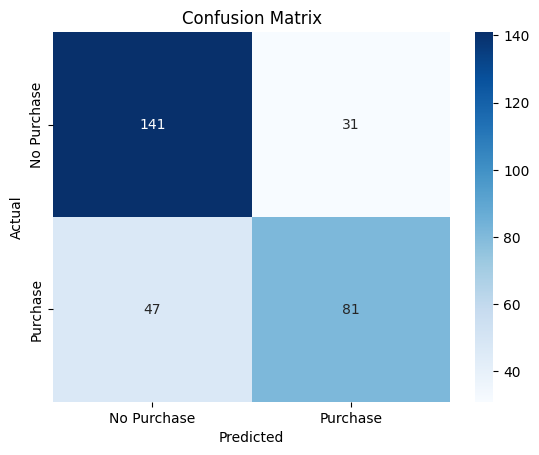

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Purchase", "Purchase"], yticklabels=["No Purchase", "Purchase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


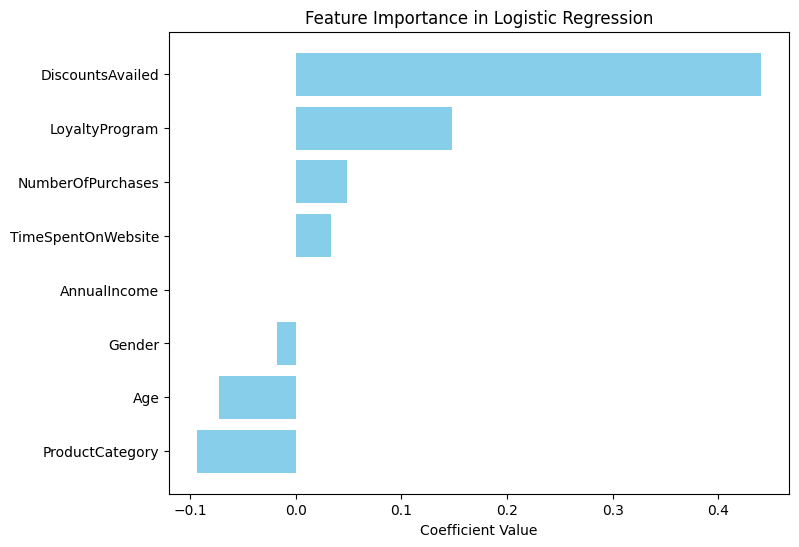

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()
plt.show()
